In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import warnings

warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
df = pd.read_csv("D:/Study/Excelr DS/Assignments/AS-10-Recommendation/book.csv", encoding = "ISO-8859-1", index_col = 0)
df.columns=["User_ID","Book_Title","Book_Rating"]
df

,User_ID,Book_Title,Book_Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


The data set has 10000 entries with 3 columns. There are no null values in the dataset

In [4]:
for i in df.columns:
    print("The dataset has", len(df[i].unique()), "Unique", i)

The dataset has 2182 Unique User_ID
The dataset has 9659 Unique Book_Title
The dataset has 10 Unique Book_Rating


In [5]:
df["Book_Rating"].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book_Rating, dtype: int64

<AxesSubplot:xlabel='Book_Rating', ylabel='count'>

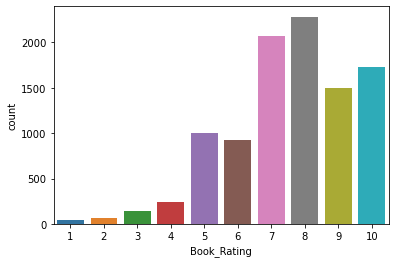

In [6]:
sns.countplot(x='Book_Rating', data=df)

# Recommending Books according to Users similarity

In [7]:
#Creating a dataframe with user id as index and book titles as column names
final=pd.pivot_table(df,values='Book_Rating',index='User_ID',columns='Book_Title')
final

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [8]:
#imputing the missing values with 0
final.fillna(0, inplace=True)
final.head()

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#cosin matrix
user_sim = 1-pairwise_distances(final.values, metric="cosine")
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
#filling the diagonal values with 0 so that the ids does not show similarity with itself
np.fill_diagonal(user_sim, 0)

In [11]:
#converting the matrix into dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#set the index and column names to user ids
user_sim_df.index = df.User_ID.unique()
user_sim_df.columns = df.User_ID.unique()
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#finding the counts for each users
z = df['User_ID'].value_counts().reset_index()
z.columns = ['col', 'count']
z

,col,count
0,3757,523
1,162052,214
2,2276,212
3,4017,156
4,277427,150
...,...,...
2177,969,1
2178,967,1
2179,965,1
2180,951,1


It is not advisible to recommend books on the basis of users who have rated very few books, say even less than 5. Hence, for our recommendation engine we will consider the users who have rated atleast 5 books.

In [14]:
# considering the users who have rated atleast 5 books
book1 = z.loc[z["count"]<5,'col'].values
book1

array([  1184, 277197, 278648, ...,    965,    951, 162129], dtype=int64)

In [15]:
for i in book1:
    user_sim_df.drop([i], axis=1, inplace=True)

In [16]:
user_sim_df

,276747,276813,276822,276847,276859,276861,276866,276872,276875,276904,...,162001,162014,162017,162019,162030,162035,162052,162092,162095,162121
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
user_sim_df_transposed = user_sim_df.T
user_sim_df_transposed

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#finding the 2 most similar users for each users
ID = []
user = []
for i in user_sim_df_transposed.columns:
    similar_id = i
    similar = user_sim_df_transposed.nlargest(2, i).index.values
    ID.append(similar_id)
    user.append(similar)

In [19]:
similar_users = pd.DataFrame(user, columns=["user1","user2"])
similar_users

,user1,user2
0,276747,276813
1,276747,276813
2,276747,276813
3,276747,276813
4,276747,276813
...,...,...
2177,276747,276813
2178,276747,276813
2179,276747,276813
2180,276747,276813


In [20]:
user_id = pd.DataFrame(ID, columns=["userid"])
user_id

,userid
0,276726
1,276729
2,276736
3,276737
4,276744
...,...
2177,162107
2178,162109
2179,162113
2180,162121


In [21]:
#creating a dataframe with the userid along with the 2 most similar userids
similar_df = pd.concat([user_id,similar_users], axis=1)
similar_df

,userid,user1,user2
0,276726,276747,276813
1,276729,276747,276813
2,276736,276747,276813
3,276737,276747,276813
4,276744,276747,276813
...,...,...,...
2177,162107,276747,276813
2178,162109,276747,276813
2179,162113,276747,276813
2180,162121,276747,276813


In [22]:
#extracting the similar users for a specified userid
user1 = similar_df[similar_df['userid'] == 162121].iloc[:,1:].values
user1

array([[276747, 276813]], dtype=int64)

In [23]:
#extracting the books which is already read and rated by the specified user
book_read = df.loc[(df == 162121).any(axis=1),'Book_Title'].values
book_read

array(['The Cloister Walk', 'Open Water', 'The Evolution of Jane',
       'AT PARADISE GATE',
       'I Should Have Stayed Home: The Worst Trips of the Great Writers (Travel Literature Series)',
       'American Fried: Adventures of a Happy Eater.',
       'Cannibal In Manhattan', 'How to Flirt: A Practical Guide',
       'Twilight'], dtype=object)

In [24]:
#extracting the books which are rated by the similar users
book_sugg=[]
for x in np.nditer(user1):
    book = df.loc[(df == x).any(axis=1),'Book_Title'].values
    book_sugg.append(book)
    
book_sugg

[array(['PLEADING GUILTY',
        'Under the Black Flag: The Romance and the Reality of Life Among the Pirates',
        "Where You'll Find Me: And Other Stories",
        'Nights Below Station Street',
        "Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust"],
       dtype=object),
 array(['Icebound', "I'll Be Seeing You", 'From the Corner of His Eye',
        'Isle of Dogs', 'Purity in Death',
        'This Year It Will Be Different: And Other Stories', 'Proxies'],
       dtype=object)]

In [25]:
# function to convert nested list with arrays into a list
def flatten(x):
    for e in x:
        if isinstance(e, list):
            yield from flatten(e)
        else:
            yield e

In [26]:
#we will only recommend the books which are not read by the specified user yet
this = []
for bi in flatten(book_sugg):
    if bi not in book_read:
        read = bi
        this.append(read)
        
Suggested = pd.DataFrame(np.concatenate(this, axis=0))        
Suggested

,0
0,PLEADING GUILTY
1,Under the Black Flag: The Romance and the Real...
2,Where You'll Find Me: And Other Stories
3,Nights Below Station Street
4,Hitler's Secret Bankers: The Myth of Swiss Neu...
5,Icebound
6,I'll Be Seeing You
7,From the Corner of His Eye
8,Isle of Dogs
9,Purity in Death


In [27]:
#if the number of recommended books is more than 10, then we will only show the top 10 books
if len(Suggested)>10:
    Suggested = Suggested.iloc[:10]
else:
    Suggested = Suggested

Suggested

,0
0,PLEADING GUILTY
1,Under the Black Flag: The Romance and the Real...
2,Where You'll Find Me: And Other Stories
3,Nights Below Station Street
4,Hitler's Secret Bankers: The Myth of Swiss Neu...
5,Icebound
6,I'll Be Seeing You
7,From the Corner of His Eye
8,Isle of Dogs
9,Purity in Death


# Recommendation based on Popularity

In [28]:
#showing the number of times a particular book is rated
num_rating_df = df.groupby('Book_Title').count()['Book_Rating'].reset_index()
num_rating_df.rename(columns={'Book_Rating':'num_ratings'},inplace=True)
num_rating_df

,Book_Title,num_ratings
0,"Jason, Madison &amp",1
1,Other Stories;Merril;1985;McClelland &amp,1
2,Repairing PC Drives &amp,1
3,'48,1
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,1
...,...,...
9654,"\Surely You're Joking, Mr. Feynman!\: Adventur...",1
9655,"\Well, there's your problem\: Cartoons",1
9656,iI Paradiso Degli Orchi,1
9657,stardust,1


In [29]:
#average ratings for each book
avg_rating_df = df.groupby('Book_Title').mean()['Book_Rating'].reset_index()
avg_rating_df.rename(columns={'Book_Rating':'avg_ratings'},inplace=True)
#avg_rating_df.drop_duplicates(['Book_Title'], inplace=True)
avg_rating_df

,Book_Title,avg_ratings
0,"Jason, Madison &amp",8.0
1,Other Stories;Merril;1985;McClelland &amp,6.0
2,Repairing PC Drives &amp,4.0
3,'48,7.0
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,8.0
...,...,...
9654,"\Surely You're Joking, Mr. Feynman!\: Adventur...",8.0
9655,"\Well, there's your problem\: Cartoons",9.0
9656,iI Paradiso Degli Orchi,7.0
9657,stardust,5.0


In [30]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book_Title')
popular_df

,Book_Title,num_ratings,avg_ratings
0,"Jason, Madison &amp",1,8.0
1,Other Stories;Merril;1985;McClelland &amp,1,6.0
2,Repairing PC Drives &amp,1,4.0
3,'48,1,7.0
4,'O Au No Keia: Voices from Hawai'I's Mahu and ...,1,8.0
...,...,...,...
9654,"\Surely You're Joking, Mr. Feynman!\: Adventur...",1,8.0
9655,"\Well, there's your problem\: Cartoons",1,9.0
9656,iI Paradiso Degli Orchi,1,7.0
9657,stardust,1,5.0


In [31]:
popular_df = popular_df[popular_df['num_ratings']>=3].sort_values('avg_ratings',ascending=False).head(50)

In [32]:
#showing the most popular 50 books where number of ratings are more than 3
popular_df = popular_df.merge(df,on='Book_Title').drop_duplicates('Book_Title')[['Book_Title','num_ratings','avg_ratings']]
popular_df

,Book_Title,num_ratings,avg_ratings
0,The Face,3,9.000000
3,"The Subtle Knife (His Dark Materials, Book 2)",4,8.750000
7,Stardust,4,8.500000
11,The Testament,3,8.333333
14,High Fidelity,3,8.333333
17,The Neverending Story,3,8.333333
20,The Hitchhiker's Guide to the Galaxy,3,8.333333
23,"The Golden Compass (His Dark Materials, Book 1)",3,8.333333
26,"The Amber Spyglass (His Dark Materials, Book 3)",4,8.250000
30,Suzanne's Diary for Nicholas,3,8.000000


# Nearest Neighbors Algorithm

In [33]:
#creating a dataframe which contain books that are atleast rated two times
number_rating = df.groupby('Book_Title')['Book_Rating'].count().reset_index()
number_rating.rename(columns= {'Book_Rating':'number_of_ratings'}, inplace=True)
final_rating = df.merge(number_rating, on='Book_Title')
final_rating.shape
final_rating = final_rating[final_rating['number_of_ratings'] >= 2]
final_rating.drop_duplicates(['User_ID','Book_Title'], inplace=True)

In [34]:
#creating a dataframe with book title as index and user id as columns
book_pivot = final_rating.pivot_table(columns='User_ID', index='Book_Title', values="Book_Rating")
book_pivot.fillna(0, inplace=True)
book_pivot

User_ID,19,51,53,82,83,85,86,160,183,190,...,278636,278637,278648,278668,278675,278694,278715,278843,278844,278851
Book_Title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2061: Odyssey Three,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Density of Souls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World of Pies : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wouldn't Take Nothing for My Journey Now,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#But here in the pivot table, we have lots of zero values which will increase the computational time while calculating distance
#so we will convert the pivot table to the sparse matrix and then feed it to the model.


book_sparse = csr_matrix(book_pivot)

In [36]:
#Now we will train the nearest neighbors algorithm. 
#here we need to specify an algorithm which is brute means find the distance of every point to every other point.


model = NearestNeighbors(algorithm='brute',metric = 'cosine')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [37]:
# creating random number for checking
random_no= np.random.choice(book_pivot.shape[0])
print(random_no)

108


In [38]:
#Let’s make a prediction and see whether it is suggesting books or not.
# we will find the nearest neighbors to the input book id and after that,
# we will print the top 10 books which are closer to those books. It will provide us distance and book id at that distance. 
#let us pass harry potter which is at 10 indexes.

distances, suggestions = model.kneighbors(book_pivot.iloc[random_no,:].values.reshape(1, -1), n_neighbors = 11)

In [39]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_pivot.index[random_no]))
    else:
        print('{0}: {1} ,with distance of {2}:'.format(i, book_pivot.index[suggestions.flatten()[i]], distances.flatten()[i]))

Recommendations for Life Before Man:

1: The Adventures of Tom Sawyer ,with distance of 0.33435976452972505:
2: Cavedweller ,with distance of 0.44338769815190415:
3: The Perfect Storm : A True Story of Men Against the Sea ,with distance of 0.45209104720017323:
4: Wouldn't Take Nothing for My Journey Now ,with distance of 0.45209104720017323:
5: Hannibal ,with distance of 0.48022230181094805:
6: The Robber Bride ,with distance of 0.5590142259716089:
7: Animal Husbandry ,with distance of 0.6077677297236319:
8: The Nurse's Story ,with distance of 0.6077677297236319:
9: The Boy Next Door ,with distance of 0.6077677297236319:
10: Pigs in Heaven ,with distance of 0.7416814906542295:


# Recommendation Engine

## Description about the function

* Here, a recommendation engine is build named Book_Recommender.

* The function has one compulsory and one optional parameter. The compulsory parameter is of the dataframe. For this you need to specify a dataframe that is to be used for the recommendation. And the optional parameter is user. It is of boolean type whose default value is True.

* It shows recommendations in three ways:

> 1. User based (collaborative filtering) : When the value of user is kept default, then it will show recommendations for a particular user on the basis of the similar users. Cosin similarity score is used to find out the two most similar users for a specified user. For the selection of the similar users, only those users are considered who have rated atleast 5 books. On the basis of their user id the books are recommended to the specified user. If the number of books recommended are more than 15 then it will only show the top 15 books as recommended.

> 2. Popularity based : For this recommendation, the value of user needs to be given as False. By doing so it will ask for a user input, where the user can specify that they want to browse on the basis of popularity. This will show top 50 books based on their popularity. The popularity is decided on the basis of their average ratings and the number of times that book has been rated by the users.

> 3. Content based : For this recommendation, the value of user needs to be given as False. By doing so it will ask for a user input, where the user can specify that they want to browse for a specific book. By selecting that option the user will be ask to mention the book id. Based on the book id specified the result will recommend 11 books. One book will be of the mentioned Id and the rest 10 will be the books which are similar to the book whose id is mentioned by the user.

In [40]:
def Book_Recommender(df,user=True):
    ''' will show recommendations
        df = data frame to be mentioned by the user (compulsory)
        user = (default = True) : will show user based recommendations(collaborative filtering)
             = False : will show popularity and content based recommendations as mentioned by the users
    '''
    if user == True:
        imp = input("Enter userid:")
        userid=int(imp)
        pivot=pd.pivot_table(df,values='Book_Rating',index='User_ID',columns='Book_Title')
        pivot.fillna(0, inplace=True) #imputing the missing values with 0
        
        user_sim = 1-pairwise_distances(pivot.values, metric="cosine")
        np.fill_diagonal(user_sim, 0)
        user_sim_df = pd.DataFrame(user_sim)
        
        #set the index and column names to user ids
        user_sim_df.index = df.User_ID.unique()
        user_sim_df.columns = df.User_ID.unique()
        z = df['User_ID'].value_counts().reset_index()
        z.columns = ['col', 'count']
        user_frq = z.loc[z["count"]<5,'col'].values
        
        for i in user_frq:
            user_sim_df.drop([i], axis=1, inplace=True)
        
        user_sim_df_transposed = user_sim_df.T
        ID = []
        user = []
        for i in user_sim_df_transposed.columns:
            similar_id = i
            similar = user_sim_df_transposed.nlargest(2, i).index.values
            ID.append(similar_id)
            user.append(similar)
        
        similar_users = pd.DataFrame(user, columns=["user1","user2"])
        user_id = pd.DataFrame(ID, columns=["userid"])
        similar_df = pd.concat([user_id,similar_users], axis=1)
        
        user1 = similar_df[similar_df['userid'] == userid].iloc[:,1:].values
        
        
        book_read = df.loc[(df == userid).any(axis=1),'Book_Title'].values
        book_sugg=[]
        
        for x in np.nditer(user1):
            book = df.loc[(df == x).any(axis=1),'Book_Title'].values
            book_sugg.append(book)
        this = []
        for bi in flatten(book_sugg):
            if bi not in book_read:
                read = bi
                this.append(read)
        
        Suggested = pd.DataFrame(np.concatenate(this, axis=0), columns = ["Suggested Books"]) 
        if len(Suggested)>15:
            Suggested = Suggested.iloc[:15]
        else:
            Suggested = Suggested
        print("Suggested Books for the user id :", userid)
        return Suggested
    
    else:
        print("Please select any one : \n 0 - To Browse for popular books \n 1 - To search for a specific book")
        choice = input("Enter your choice:")
        Book = int(choice)
        if Book==1:
            number_rating = df.groupby('Book_Title')['Book_Rating'].count().reset_index()
            number_rating.rename(columns= {'Book_Rating':'number_of_ratings'}, inplace=True)
            final_rating = df.merge(number_rating, on='Book_Title')
            final_rating.shape
            final_rating = final_rating[final_rating['number_of_ratings'] >= 2]
            final_rating.drop_duplicates(['User_ID','Book_Title'], inplace=True)
            book_pivot = final_rating.pivot_table(columns='User_ID', index='Book_Title', values="Book_Rating")
            book_pivot.fillna(0, inplace=True)
            book_sparse = csr_matrix(book_pivot)
            print("Any Number Between 0 and", book_pivot.shape[0])
            num = input("Enter Book Id:")
            random_no = int(num)
            model = NearestNeighbors(algorithm='brute',metric = 'cosine')
            model.fit(book_sparse)
            distances, suggestions = model.kneighbors(book_pivot.iloc[random_no,:].values.reshape(1, -1), n_neighbors = 11)
            for i in range(0, len(distances.flatten())):
                if i == 0:
                    print('Recommendations for {0}:\n'.format(book_pivot.index[random_no]))
                else:
                    print('{0}: {1} ,with distance of {2}:'.format(i, book_pivot.index[suggestions.flatten()[i]], distances.flatten()[i]))
                    
        else:
            num_rating_df = df.groupby('Book_Title').count()['Book_Rating'].reset_index()
            num_rating_df.rename(columns={'Book_Rating':'num_ratings'},inplace=True)
            avg_rating_df = df.groupby('Book_Title').mean()['Book_Rating'].reset_index()
            avg_rating_df.rename(columns={'Book_Rating':'avg_ratings'},inplace=True)
            #avg_rating_df.drop_duplicates(['Book_Title'], inplace=True)
            popular_df = num_rating_df.merge(avg_rating_df,on='Book_Title')
            popular_df = popular_df[popular_df['num_ratings']>=3].sort_values('avg_ratings',ascending=False).head(50)
            popular_df = popular_df.merge(df,on='Book_Title').drop_duplicates('Book_Title')[['Book_Title','num_ratings','avg_ratings']]
            return popular_df

### For Example

In [41]:
#user based recommendation or collaborative filtering
Book_Recommender(df=df)

Enter userid:276847
Suggested Books for the user id : 276847


,Suggested Books
0,PLEADING GUILTY
1,Under the Black Flag: The Romance and the Real...
2,Where You'll Find Me: And Other Stories
3,Nights Below Station Street
4,Hitler's Secret Bankers: The Myth of Swiss Neu...
5,Icebound
6,I'll Be Seeing You
7,From the Corner of His Eye
8,Isle of Dogs
9,Purity in Death


In [42]:
#recommendations based on popularity
Book_Recommender(df=df, user=False)

Please select any one : 
 0 - To Browse for popular books 
 1 - To search for a specific book
Enter your choice:0


,Book_Title,num_ratings,avg_ratings
0,The Face,3,9.000000
3,"The Subtle Knife (His Dark Materials, Book 2)",4,8.750000
7,Stardust,4,8.500000
11,The Testament,3,8.333333
14,High Fidelity,3,8.333333
17,The Neverending Story,3,8.333333
20,The Hitchhiker's Guide to the Galaxy,3,8.333333
23,"The Golden Compass (His Dark Materials, Book 1)",3,8.333333
26,"The Amber Spyglass (His Dark Materials, Book 3)",4,8.250000
30,Suzanne's Diary for Nicholas,3,8.000000


In [43]:
#contend based recommendation
Book_Recommender(df=df, user=False)

Please select any one : 
 0 - To Browse for popular books 
 1 - To search for a specific book
Enter your choice:1
Any Number Between 0 and 305
Enter Book Id:200
Recommendations for The Boy Next Door:

1: The Magician's Tale ,with distance of 0.2928932188134524:
2: Pride and Prejudice ,with distance of 0.32416218161695276:
3: Juniper ,with distance of 0.3500663163803185:
4: How to Make an American Quilt ,with distance of 0.42460354443124937:
5: Body of Lies ,with distance of 0.4567855237448888:
6: Alice's Tulips ,with distance of 0.4567855237448888:
7: Don't Worry, Make Money: Spiritual and Practical Ways to Create Abundance and More Fun in Your Life ,with distance of 0.4999999999999999:
8: The Nurse's Story ,with distance of 0.4999999999999999:
9: Animal Husbandry ,with distance of 0.4999999999999999:
10: Othello ,with distance of 0.4999999999999999:
